In [15]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Idea
<Br>
This is a simple exercise to simulate price paths for stock under <B>risk-neutral measure</B>. In particular, we assume stock price follows <B>Geometric Brownian Motion</B> under risk-neutral measure:

$$dS(t) = rS(t)dt + \sigma S(t)dW^{Q}(t)$$
<Br>

Instead of simulating the above dynamics directly, let's apply <B>Ito's Lemma</B> to the Stochastic Differential Equation by letting 
$$g(t,S) = log(S)$$

<Br>
Solving the Stochastic Differential Equation, we have
$$dg(t,S) =(\mu - \frac{1}{2}\sigma^{2})dt + \sigma dW^{Q}(t) $$ 
$$S(t) = e^{g(t,S)}$$

Let's <B> perform simulation on log of stock price g(t, S)

#### 1.1 Setting parameters

In [16]:
no_of_paths = 25    # No. of paths to generate
no_of_steps = 500   # No. of steps for each path
T = 1             # Time
r = 0.05          # Interest rate
sigma = 0.4       # Sigma
S_0 = 100         # Initial Stock Price


#### 1.2 Generate 25 paths with 500 steps each
<Br>
We wil start by <B>generating samples from Standard Normal Distribution</B> with 25 paths and 500 steps in each path

In [24]:
np.random.seed(100)                                             # Fixing Seed
Z = np.random.normal(0.0, 1.0, [no_of_paths, no_of_steps])      # Generate 25 paths with 500 steps following Standard Normal Distribution

# Z

Next, we initialize $$g(0,S(t)) = log(S(0))$$

In [26]:
g = np.zeros([25, 501])
g[:,0] = np.log(S_0)      # Initialize X_0 which is log(S_0)

# g

Lastly, we simulate 
$$dg(t,S) =(\mu - \frac{1}{2}\sigma^{2})dt + \sigma dW^{Q}(t) $$ 

Note that 
$$S(t) = e^{g(t,S)}$$

In [27]:
dt = T/float(no_of_steps)
time = np.zeros([no_of_steps + 1])

for i in range(0, no_of_steps):

    # Make sure that samples from Standard Normal Distribution have mean 0 and variance 1 for better convergence in simulation
    Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])

    g[:,i+1] = g[:,i] + (r - 0.5 * sigma ** 2) * dt + sigma * np.power(dt,0.5) * Z[:,i]
    time[i+1] = time[i] + dt

S = np.exp(g)

#### 1.3 Plotting Graph

Text(0.5, 1.0, 'Simulation of Stock Price S(t)')

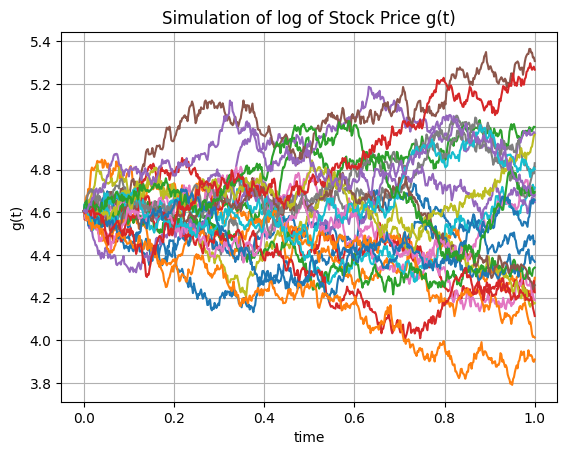

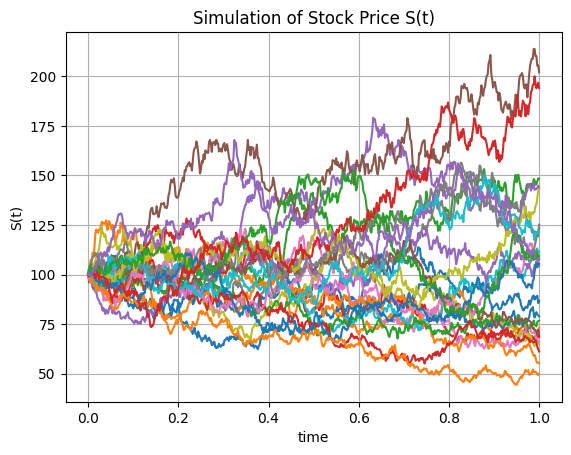

In [33]:
plt.figure(1)
plt.plot(time, np.transpose(g))   
plt.grid()
plt.xlabel("time")
plt.ylabel("g(t)")
plt.title("Simulation of log of Stock Price g(t)")
  
plt.figure(2)
plt.plot(time, np.transpose(S))   
plt.grid()
plt.xlabel("time")
plt.ylabel("S(t)")
plt.title("Simulation of Stock Price S(t)")